# 서울시 CCTV 현황 분석 및 인구 현황 분석

### CCTV 설치현황

In [1]:
import pandas as pd

In [169]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")

In [170]:
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [171]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [172]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [173]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [174]:
# CCTV_Seoul 의 첫번째 컬럼 확인
CCTV_Seoul.columns[0]

'기관명'

In [175]:
# 기관명 -> 구별로 변경
CCTV_Seoul.rename(columns={"기관명":"구별"}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [176]:
# NaN을 확인하고 NaN을 0으로 대체하기
CCTV_Seoul.isnull().sum()

구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [177]:
CCTV_Seoul.fillna(0, inplace=True)

In [178]:
CCTV_Seoul.isnull().sum()

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [179]:
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9


---
### 인구현황

In [180]:
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", header=3)
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [181]:
pop_seoul = pop_seoul[["자치구","계","계.1","계.2","65세이상고령자"]]
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [182]:
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                          header=3,
                          usecols="B, D, G, J, N"
                          )
pop_seoul.head()                          

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [183]:
pop_seoul.columns = ["구별", "인구수", "한국인", "외국인", "고령자"]

In [184]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [185]:
# 합계 행을 삭제
pop_seoul.drop(0, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


### CCTV 현황

In [186]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values("소계", inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구 순이다.

In [187]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values("소계", ascending=False ,inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [188]:
# 최근 3년간 CCTV 증가율 구해서 CCTV가 제일 많이 증가한 구를 검색
CCTV_Seoul["최근증가율"] =(CCTV_Seoul.loc[:,"2016년":"2018년"].sum(axis=1) 
                        / CCTV_Seoul.iloc[:,2:7].sum(axis=1))*100
CCTV_Seoul.sort_values("최근증가율", ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다.

---
### 인구현황

In [189]:
# 구별 Data의 유효성 확인(25개 구가 다 있는지 확인)
len(pop_seoul["구별"].unique())

25

In [190]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [191]:
pop_seoul["외국인비율"] = pop_seoul.외국인 / pop_seoul.인구수 * 100
pop_seoul["고령자비율"] = pop_seoul.고령자 / pop_seoul.인구수 * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [192]:
# 인구수가 제일 많은 지역 Top5
pop_seoul.sort_values("인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 인구수가 제일 많은 지역은 송파구, 강서구, 강남구, 노원구, 관악구 순이다.

In [193]:
# 외국인이 제일 많은 지역 Top5
pop_seoul.sort_values("외국인", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


> 외국인이 제일 많은 지역은 영등포구, 구로구, 금천구, 관악구, 동대문구 순이다.

In [194]:
# 외국인 비율이 높은 지역 Top5
pop_seoul.sort_values("외국인비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


> 외국인 비율이 제일 높은 지역은 영등포구, 중구,  금천구, 구로구, 용산구 순이다.

In [195]:
# 고령자 정렬
pop_seoul.sort_values("고령자", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [196]:
# 고령자 비율 정렬
pop_seoul.sort_values("고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


인구수가 제일 많은 지역은 송파구이지만 영등포구가 제일 외국인이 많다. 
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.   
송파구는 고령자가 제일 많지만 고령자의 비율이 높지 않은 것이 확인된다.
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는   
인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다.   

---
# CCTV와 인구현황 합치기

In [197]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643,78.008299
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,43.091787


In [198]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [199]:
data_result = pd.merge(CCTV_Seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328
2,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,72.106667,438308,405837,32471,67432,7.408261,15.384615
3,성북구,3003,779.0,84.0,304.0,241,279,388,285,643,78.008299,454532,442494,12038,72172,2.648438,15.878310
4,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [200]:
data_result.drop(list(data_result.columns)[2:10], axis=1, inplace=True)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
2,구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
3,성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
4,은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [201]:
data_result.set_index(["구별"], inplace=True)

In [202]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [203]:
import numpy as np

In [204]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result["고령자비율"], data_result["소계"])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [205]:
# 고령자와 소계의 상관계수
np.corrcoef(data_result["고령자"], data_result["소계"])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [206]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result["외국인비율"], data_result["소계"])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [207]:
# 외국인과 소계의 상관계수
np.corrcoef(data_result["외국인"], data_result["소계"])

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [208]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result["인구수"], data_result["소계"])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은 층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.

---
# 시각화

In [209]:
# impoort matplotlib.puplot as plt  # 현재방식
from matplotlib import pyplot as plt # 예전방식

In [210]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [211]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [212]:
# 파일로 저장 (CCTV_Result.csv)
data_result.to_csv("../Data/CCTV_Result.csv")

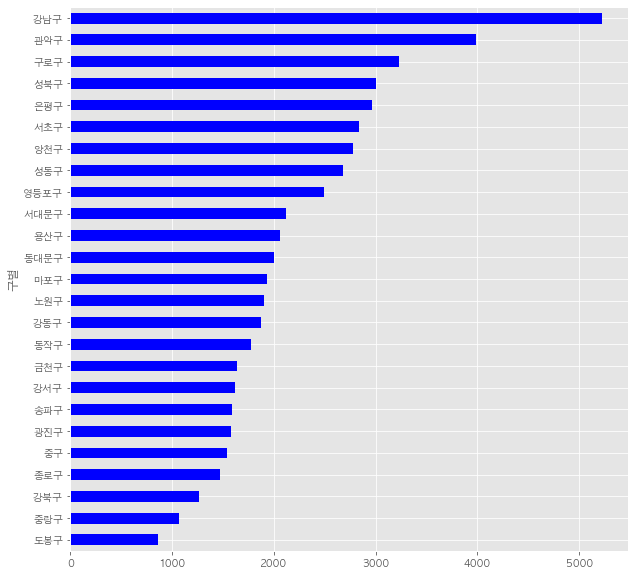

In [213]:
data_result['소계'].sort_values().plot(
    kind='barh',
    grid=True,
    figsize=(10, 10),
    color='blue'
    )
plt.show()

## 인구대비 CCTV 비율

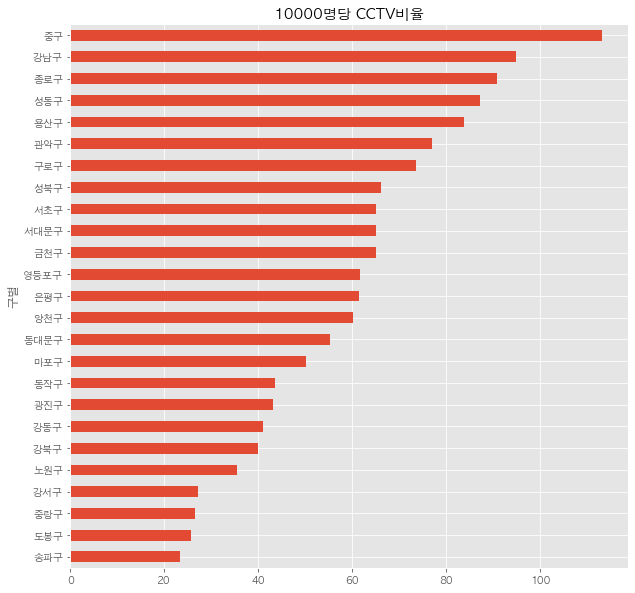

In [231]:
CCTV_ratio = data_result['소계'] / data_result['인구수'] * 10000
CCTV_ratio.sort_values().plot(
    kind='barh',
    grid=True,
    title='10000명당 CCTV비율',
    figsize=(10, 10),
    )
plt.show()

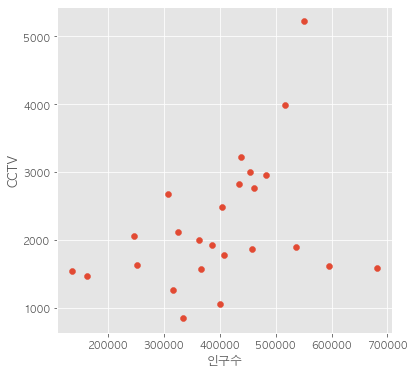

In [255]:
# 산점도를 이용한 시각화 (인구수와 소계)
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid(True)
plt.show()

In [258]:
# 인구수, 소계애 따른 기준직선(회귀선, 평균선) 만들기 - 판단을 하기위한 기준이 필요하다
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

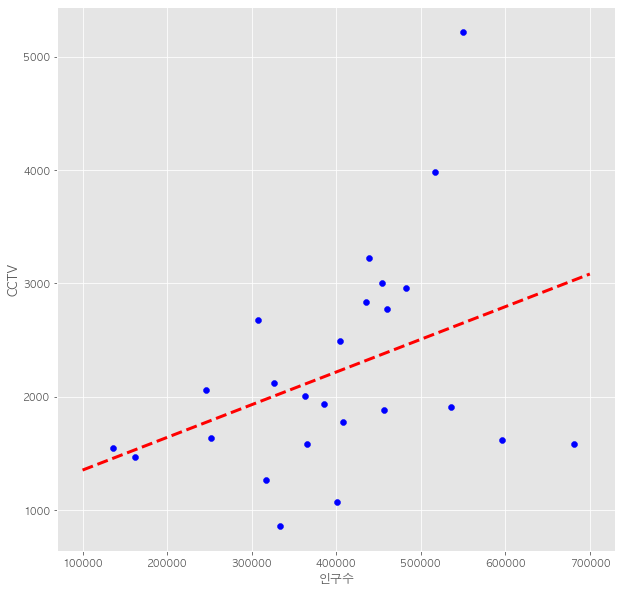

In [268]:
# x축 만들기 : 인구수 표현
fx = np.linspace(100000, 700000)

# y축 만들기 : CCTV 소계 표현
f1 = np.poly1d(fp1) # ployfit -> poly1d

plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], color='blue')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r') # 기준직선 그려주기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid(True)
plt.show()

> 이 직선은 CCTV 댓수에 기준값이 됩니다.     
> 이 직선을 기준으로 상위에 있는 점은 과하게 설치 된 것이고      
> 이 직선을 기준으로 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석이 됩니다.

In [272]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

# 기준치 구하기
f1 = np.poly1d(fp1)

# 인구수
fx = np.linspace(100000, 700000)

# 소계에서 기준 인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False) # 정렬된 데이터 생성
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


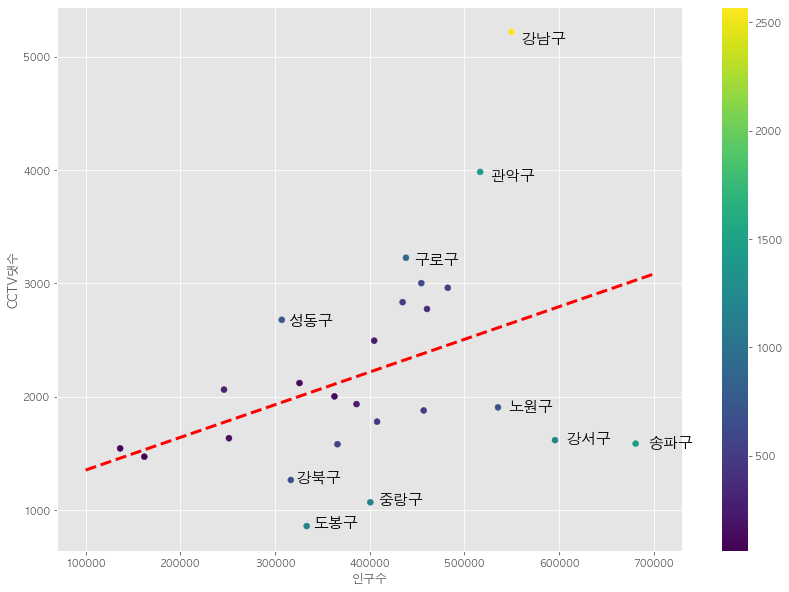

In [283]:
# 그래프에 텍스트와 Color
plt.figure(figsize=(14,10)) # 범례 추가를 위해 가로축을 확장
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'])
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r') # 기준직선 그려주기

# 오차가 가장 큰 10개웨 텍스트 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98 , df_sort.index[n],
    fontsize=15
    )

plt.colorbar()
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.grid(True)
plt.show()